In [1]:
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

# **Download Dataset from Roboflow**

In [2]:
# download_dataset('./data/tf-record-datasets', 'capstone-foodlabel', 4, "tfrecord")

# **Trained Model**

In [3]:
# load the models
model = get_model("./models/detect-nutrition-label.pt")

# **Examples**

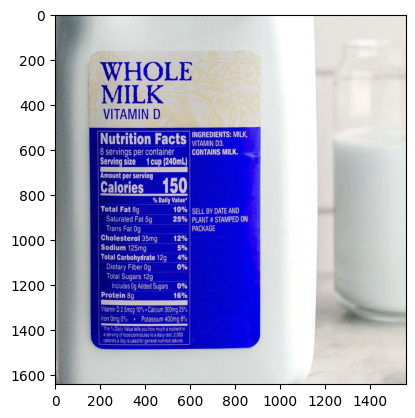

In [4]:
example = './data/example_en.webp'

image = cv2.imread(example)

plt.imshow(image)

In [5]:
prediction = model.predict(example)
x1, y1, x2, y2 = get_bounding_boxes(prediction)

print(f"---\nx1: {x1}\nx2: {x2}\ny1: {y1}\ny2: {y2}")


image 1/1 /Users/mafiefa/Projects/machine-learning-kaisar/ocr/data/example_en.webp: 640x608 1 nutrition-label, 115.9ms
Speed: 5.0ms preprocess, 115.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 608)
---
x1: 184.0738525390625
x2: 606.4226684570312
y1: 511.2749328613281
y2: 1475.827880859375


In [6]:
image_cropped = cropAndResize(image, (x1, y1, x2, y2))
image_preprocessed = preprocess_for_ocr(image_cropped)

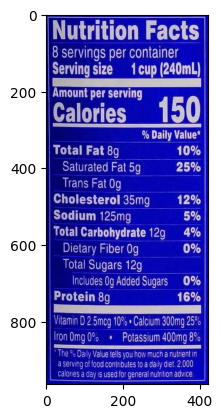

In [7]:
plt.imshow(image_cropped)

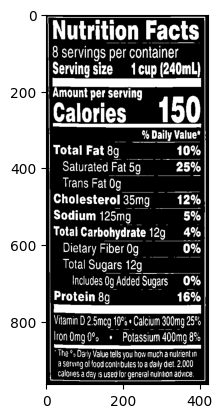

In [8]:
plt.imshow(image_preprocessed)

In [9]:
text_data = ocr(image_preprocessed)

In [10]:
preprocessed_reading = preprocess_ocr_reading(text_data)

for data in preprocessed_reading:
    print(data)

Nutrition Facts
PE
8servings per container
Serving size
1cup (240mL)
Amount per serving
Calories
150
“ Daily Value
Total Fat 8g
1040
S2
Saturated Fat 5g
25gg
Trans Fat 0g.
1246
Cholesterol 35mg
Sodium 125mg
596
Total Carbohydrate 12g
43
0Jo
Dietary Fiber 0g
Total Sugars 12g
Includes 0g Added Sugars
026
Protein 8g
1690
Vitamin D 2.5meg 10”9Calcium 300mg 25”
Iron 0mg 0?o  »  Potassium 4001mg 8”
The» Daily Value telis you how much a nutrientin
a Serving ol food conlnbutes toa datly diet. 2.000
Calones a day is used for general nulrtign advice.


In [11]:
nutrients_list = make_list('./data/nutrients.txt')

print(nutrients_list)

['Serving', 'Sajian', 'Energi', 'Energy', 'Lemak', 'Fat', 'Karbohidrat', 'Carbohydrate', 'Gula', 'Sugar', 'Sugars', 'Vitamin', 'Protein', 'Garam', 'Natrium', 'Salt', 'Sodium', 'Serat', 'Fiber', 'Kalori', 'Calories', 'Calorie', 'Kolesterol', 'Cholesterol', 'Iron', 'Besi', 'Potassium', 'Kalium', 'Kalsium', 'Calcium', 'Mineral']


In [12]:
cleaned = get_nutrient_label_value(preprocessed_reading, nutrients_list=nutrients_list)

print(cleaned)

[['8servings per container', ''], ['Amount per serving', ''], ['Calories', 150.0], ['Cholesterol 35mg', ''], ['Dietary Fiber 0g', ''], ['Includes 0g Added Sugars', 26.0], ['Iron 0mg 0?o  »  Potassium 4001mg 8”', ''], ['Protein 8g', 1690.0], ['Saturated Fat 5g', (25.0, 'gg')], ['Serving size', (1.0, 'cup')], ['Sodium 125mg', 596.0], ['Total Carbohydrate 12g', 43.0], ['Total Fat 8g', 1040.0], ['Total Sugars 12g', ''], ['Trans Fat 0g.', 1246.0], ['Vitamin D 2.5meg 10”9Calcium 300mg 25”', ''], ['a Serving ol food conlnbutes toa datly diet. 2.000', '']]


In [13]:
corrected_readings = correct_readings(cleaned)

print(corrected_readings)

[['8servings per container', ''], ['Amount per serving', ''], ['Calories', 150.0], ['Cholesterol', (35.0, 'mg')], ['Dietary Fiber', (0.0, 'g')], ['Includes  Added Sugars', (0.0, 'g')], ['Iron  0?o  »  Potassium  8”', (0.0, 'mg')], ['Protein', (8.0, 'g')], ['Saturated Fat', (5.0, 'g')], ['Serving size', (1.0, 'cup')], ['Sodium', (125.0, 'mg')], ['Total Carbohydrate', (12.0, 'g')], ['Total Fat', (8.0, 'g')], ['Total Sugars', (12.0, 'g')], ['Trans Fat .', (0.0, 'g')], ['Vitamin D 2.5meg 10”9Calcium  25”', (300.0, 'mg')], ['a Serving ol food conlnbutes toa datly diet. 2.000', '']]


In [14]:
print(to_nutritional_dict(label_value_list=corrected_readings))

{'sajian': [(1.0, 'cup')], 'energi': [], 'karbohidrat': [(12.0, 'g')], 'gula': [(0.0, 'g'), (12.0, 'g')], 'protein': [(8.0, 'g')], 'vitamin': [(300.0, 'mg')], 'lemak': [(5.0, 'g'), (8.0, 'g'), (0.0, 'g')], 'garam': [(125.0, 'mg')], 'kalori': [], 'serat': [(0.0, 'g')], 'kolesterol': [(35.0, 'mg')], 'mineral': [(0.0, 'mg'), (300.0, 'mg')]}
